In [1]:
labelumap="separate"
GOI="PAX6"
labelcycle=False
plot_names=False
check_markers=False
show_contribution=False
show_influence=False
show_maelstrom=False
correlation_maelstrom="max_cor"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from IPython.display import display, Markdown
from anansescanpy import *

/home/julian/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Integrated corneal meta-atlas and gene of interest

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Using a try except loop to reduce loading in the dataset again in an active session

try: adata
except NameError: adata = None
    
if adata is None:
    adata=sc.read("data/fullcornea_scVI_postprocessing_labels.h5ad")
    adata.obs['leiden'].cat.reorder_categories(["6","3","2","8","0","9","1","12","18","4","7","10","11","5","13","15","16","14","17","20","19"], inplace=True)
    adata.obs['leiden'] = adata.obs['leiden'].cat.rename_categories({"6": "1: LSC",
            "3": "2: LESC",
            "2": "3: LE",
            "8": "4: LE",
            "0": "5: Cj",
            "9": "6: Cj",
            "1": "7: CE",
            "12": "8: CE",
            "18": "9: CE",
            "4": "10: qSK",
            "7": "11: SK",
            "10": "12: SK",
            "11": "13: TSK",
            "5": "14: CSSC",
            "13": "15: CF",
            "15": "16: EC",
            "16": "17: Ves",
            "14": "18: Mel",
            "17": "19: IC",
            "20": "20: nm-cSC",
            "19": "21: MC",
        })
    adata=adata.raw.to_adata()
    uns_colors=adata.uns
else:
    None

In [6]:
# Check if the gene of interest (should have HGNC symbol) is present in the meta-atlas
try:
    GOI=GOI.upper() # Converts lowercase input to uppercase
    test = adata[adata.obs_vector(GOI) > 0.0, :]
except KeyError as ke:
    print('Gene of interest is not expressed in cell states of the corneal meta-atlas or input of GOI is not according to HGNC')

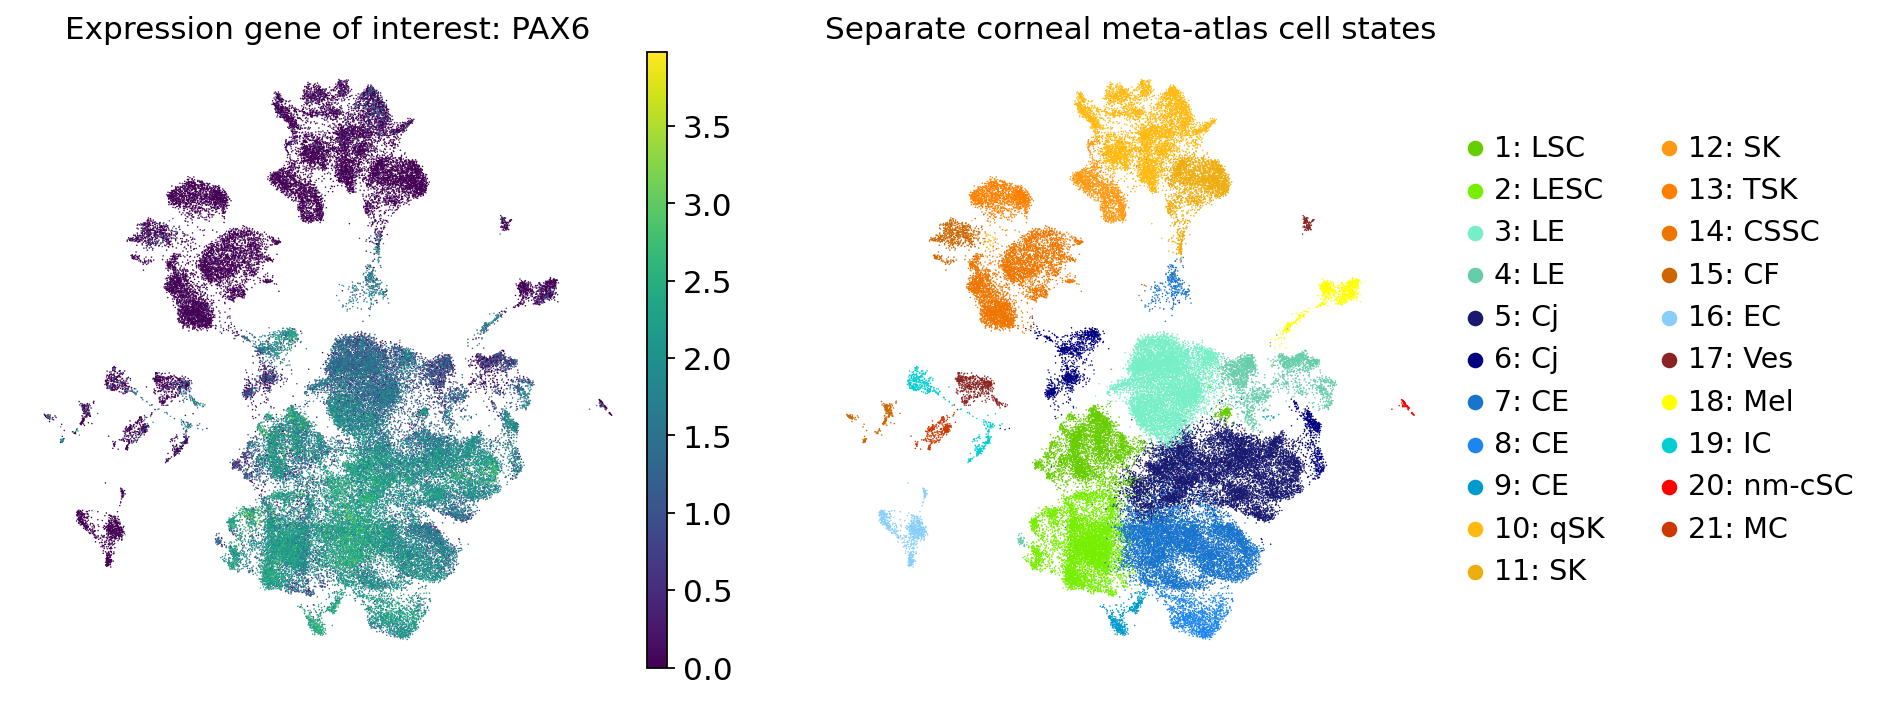

In [7]:
sc.set_figure_params(figsize=(5, 5))
if plot_names==True:
    loc_leg='on data'
    font_size=6.2
else:
    loc_leg='right margin'
    font_size=None

if labelumap == "separate":
    label_umap="leiden"
    sc.pl.umap(
        adata,
        color=[GOI,label_umap], 
        frameon=False,
        ncols=2,
        cmap='viridis',
        legend_loc=loc_leg,
               legend_fontsize=font_size, 
        legend_fontoutline=2,
        palette={
            "1: LSC": "#66CD00",
            "2: LESC": "#76EE00",
            "3: LE": "#76EEC6",
            "4: LE": "#66CDAA",
            "5: Cj": "#191970",
            "6: Cj": "#000080",
            "7: CE": "#1874CD",
            "8: CE": "#1C86EE",
            "9: CE": "#009ACD",
            "10: qSK": "#FFB90F",
            "11: SK": "#EEAD0E",
            "12: SK": "#FF9912",
            "13: TSK": "#FF7F00",
            "14: CSSC": "#EE7600",
            "15: CF": "#CD6600",
            "16: EC": "#87CEFA",
            "17: Ves": "#8B2323",
            "18: Mel": "#FFFF00",
            "19: IC": "#00CED1",
            "20: nm-cSC": "#FF0000",
            "21: MC": "#CD3700",
        }, title=[str("Expression gene of interest: "+GOI),"Separate corneal meta-atlas cell states"])
elif labelumap == "joined":
    label_umap="leiden_anno"
    sc.pl.umap(
        adata,
        color=[GOI,label_umap],
        legend_loc=loc_leg,
        frameon=False,
        cmap='viridis',
        ncols=2,
        title=[str("Gene of interest: "+GOI),"Joined corneal meta-atlas cell states"])    
    
else:
    sc.pl.umap(
        adata,
        color=[GOI,labelumap],
        legend_loc=loc_leg,
        frameon=False,
        cmap='viridis',
        ncols=2)

    LSC = Limbal stem cells       LESC = Limbal epithelial stem cells   LE = Limbal epithelium      Cj = Conjunctiva
    CE = Central epithelium       qSK = quiescent stromal keratocytes   SK= Stromal keratocytes
    TSK = Transitioning SK        CSSC = Corneal stromal stem cells     CF= Corneal fibroblasts     EC = Endothelial cells
    Ves= Lymph and blood vessels  Mel= Melanocytes                      IC = Immune cells           MC= Mural cells
    nm-cSC = Non-myelinating corneal Schwann cells

# Violin plot of gene of interest

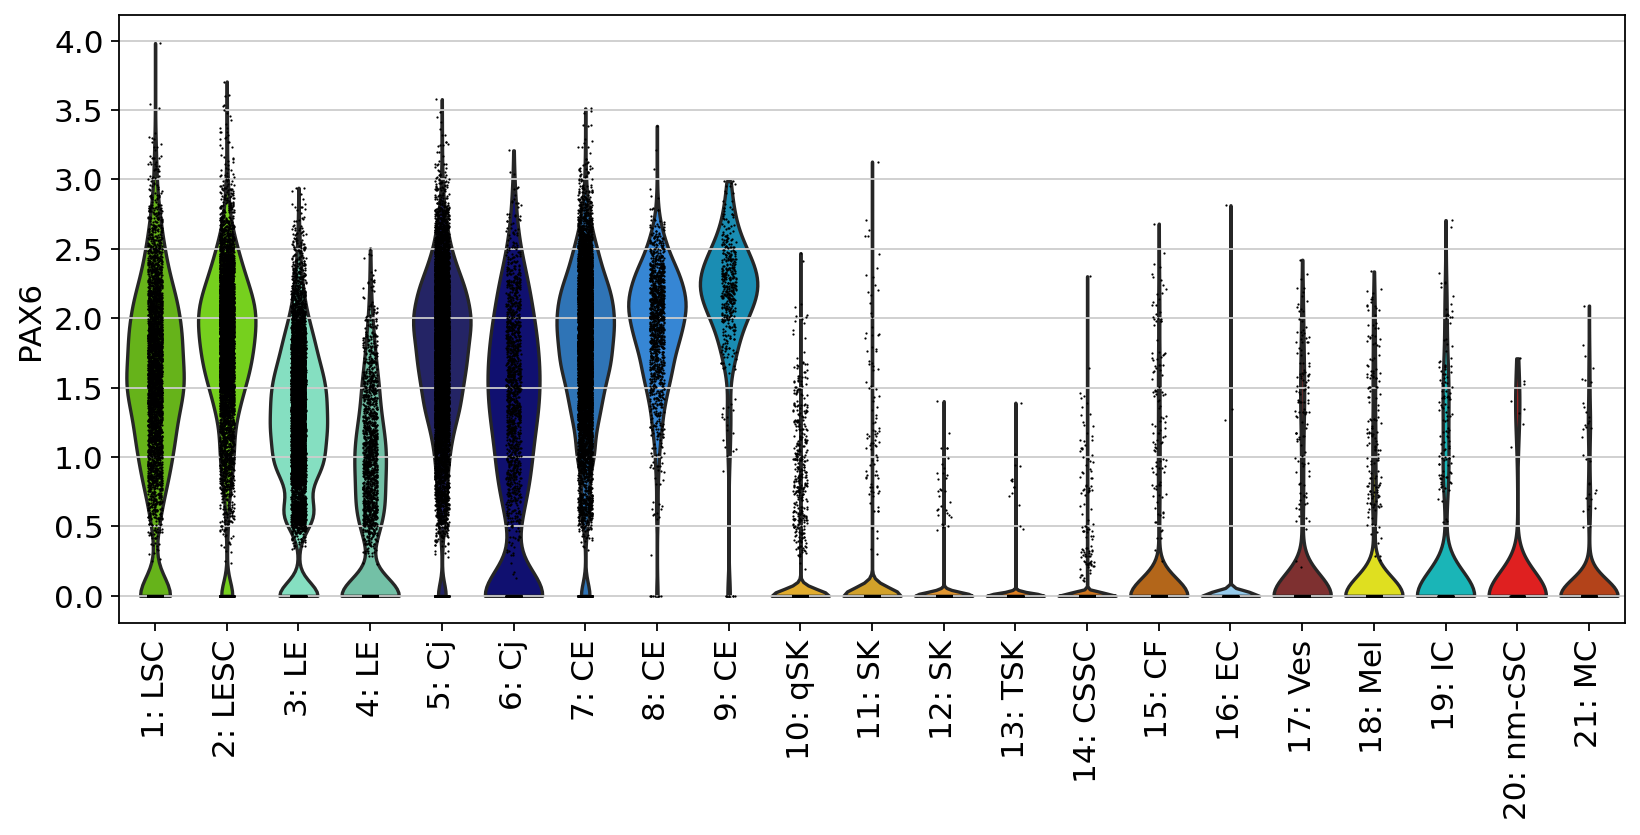

In [9]:
sc.set_figure_params(figsize=(10, 5))

if labelumap == "separate":
    key="leiden"

if labelumap == "joined":
    key="leiden_anno"
    
if labelumap == "batch":
    key="batch"

sc.pl.violin(adata, keys=GOI, groupby=key, rotation=90)

# Marker gene visualisation
        

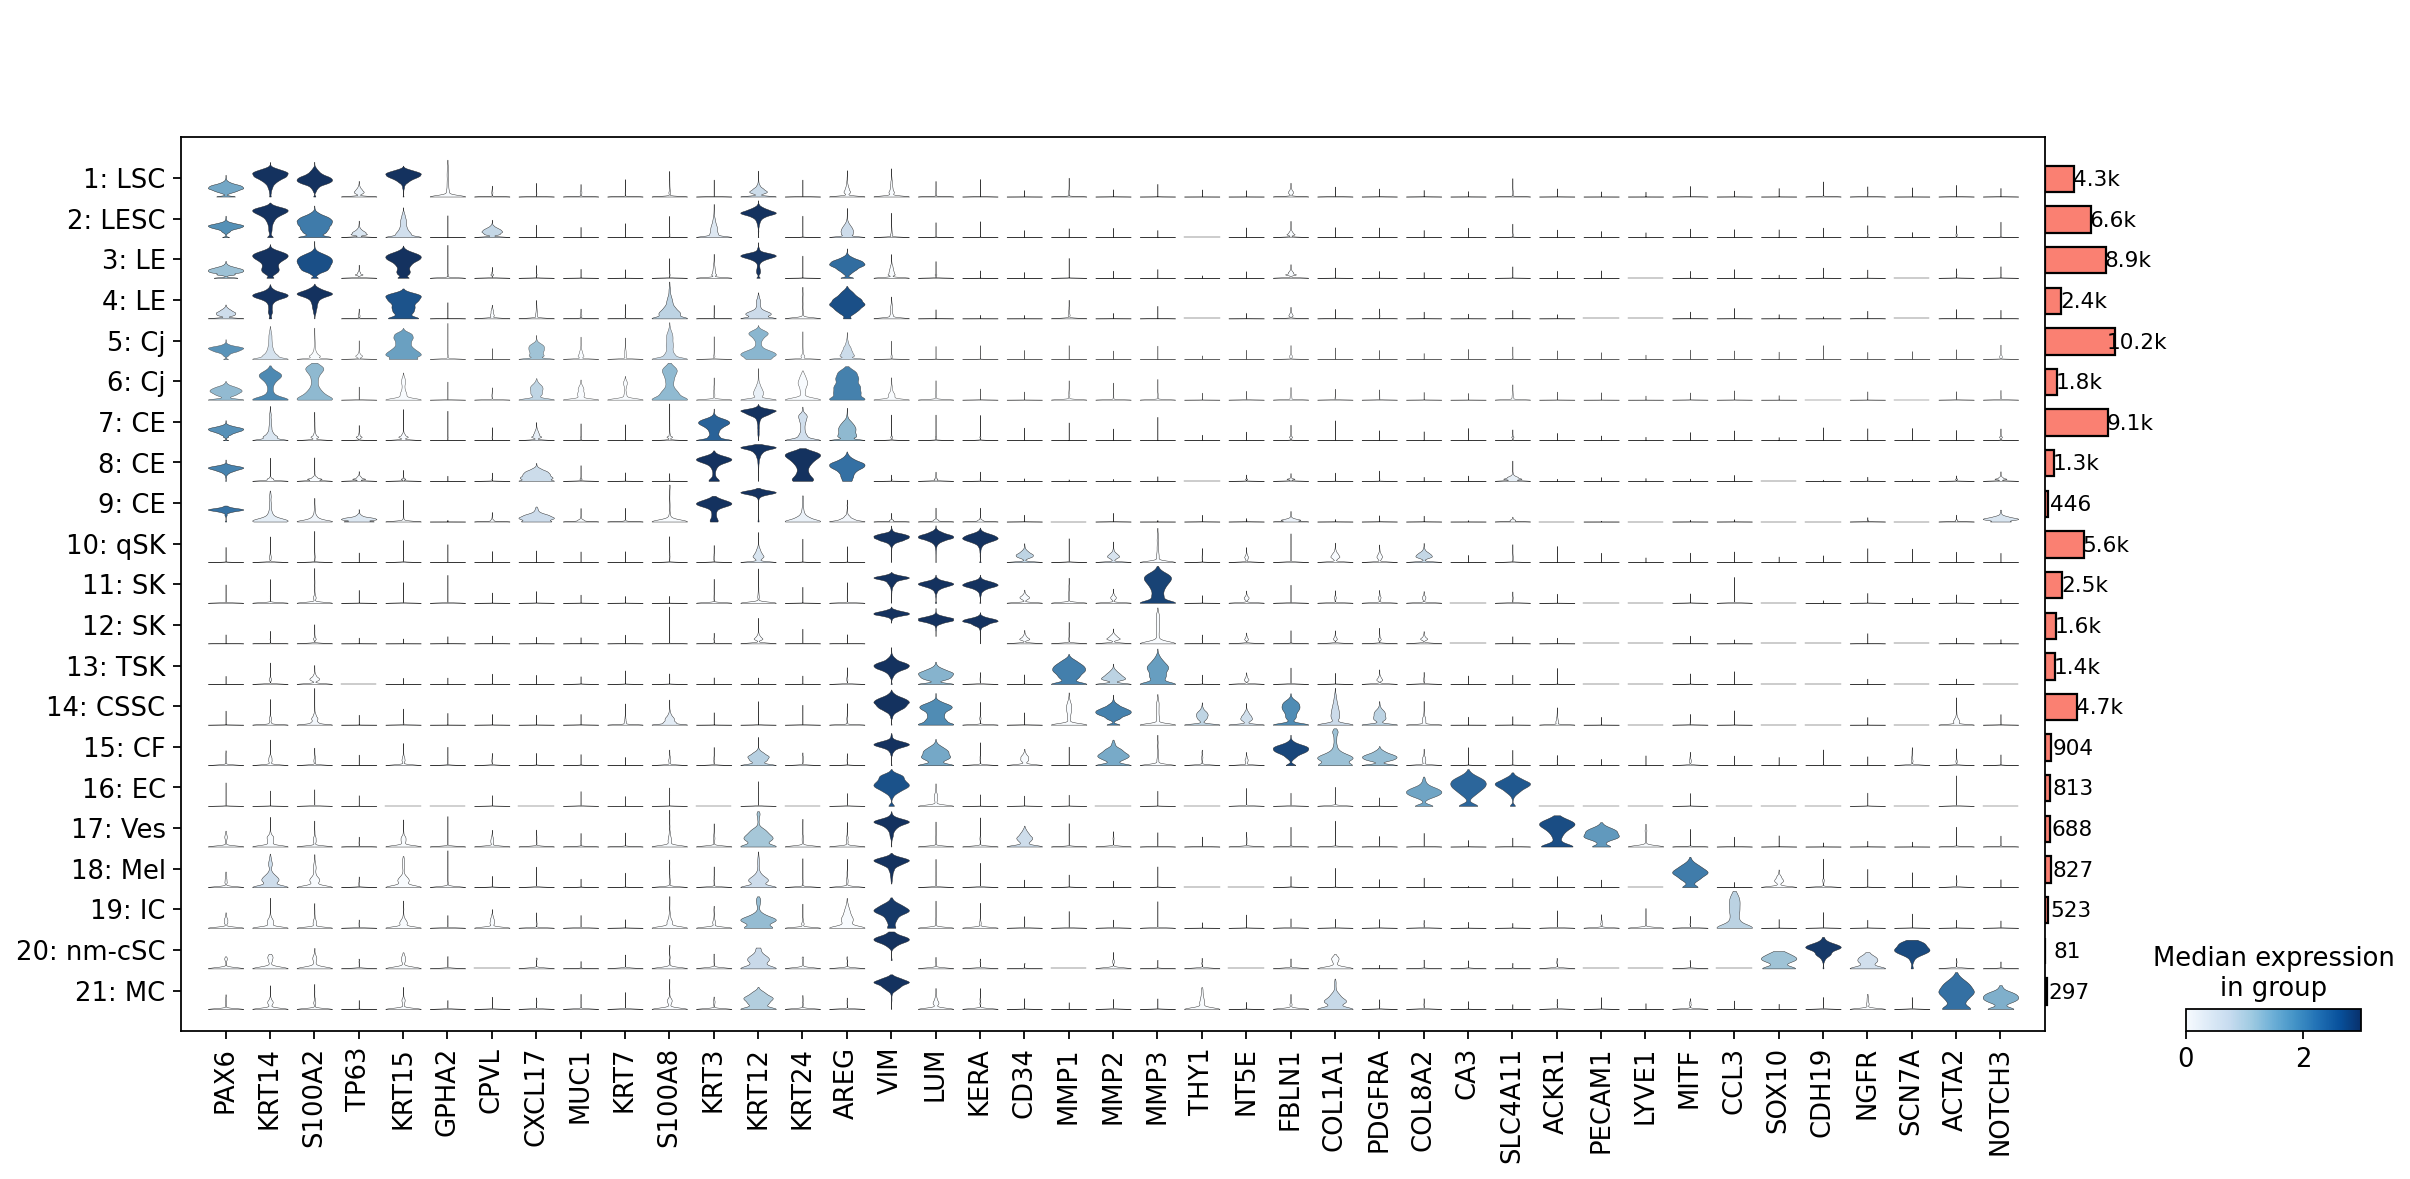

In [26]:
sc.set_figure_params(figsize=(5, 5))
markers = ["PAX6","KRT14","S100A2","TP63","KRT15","GPHA2","CPVL","CXCL17","MUC1","KRT7",
           "S100A8","KRT3","KRT12","KRT24","AREG","VIM","LUM","KERA","CD34","MMP1","MMP2","MMP3",
           "THY1","NT5E","FBLN1","COL1A1","PDGFRA","COL8A2","CA3","SLC4A11","ACKR1","PECAM1",
           "LYVE1","MITF","CCL3","SOX10","CDH19","NGFR","SCN7A","ACTA2","NOTCH3"]
if check_markers==True:
    display(Markdown("""# Marker gene visualisation
        """))
    sc.pl.StackedViolin(adata, markers, groupby="leiden",vmax=3).add_totals().show()
else:
    None

In [27]:
sc.set_figure_params(figsize=(5, 5))
markers_cycle = ["MKI67","TOP2A","PCNA","MCM6"]

if labelumap == "separate":
    key="leiden"

if labelumap == "joined":
    key="leiden_anno"
    
if labelumap == "batch":
    key="batch"

if labelcycle==True:
    display(Markdown("""# Cell cycle gene visualisation
        """))
    sc.pl.violin(adata, keys=markers_cycle, groupby=key, rotation=90)
else:
    None

In [29]:
if labelumap == "separate":
    key="leiden"
elif labelumap == "joined":
    key="leiden_anno"
else:
    key="leiden"

if show_contribution == True:
    display(Markdown("""# # Stacked barplots of absolute and relative contributions to corneal cell states
        """))
    sc.set_figure_params(figsize=(10, 5))
    obs_1 = 'batch'
    obs_2 = key

    n_categories = {x : len(adata.obs[x].cat.categories) for x in [obs_1, obs_2]}
    df = adata.obs[[obs_2, obs_1]].values

    obs2_clusters = adata.obs[obs_2].cat.categories.tolist()
    obs1_clusters = adata.obs[obs_1].cat.categories.tolist()

    obs1_to_obs2 = {k: np.zeros(len(obs2_clusters), dtype="i")
                       for k in obs1_clusters}
    obs2_to_obs1 = {k: np.zeros(len(obs1_clusters), dtype="i")
                       for k in obs2_clusters}
    obs2_to_obs1

    for b, l in df:
        obs2_to_obs1[b][obs1_clusters.index(str(l))] += 1
        obs1_to_obs2[l][obs2_clusters.index(str(b))] += 1

    df = pd.DataFrame.from_dict(obs2_to_obs1,orient = 'index').reset_index()
    df = df.set_index(["index"])
    df.columns=obs1_clusters
    df.index.names = ['Cell fate']

    stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)

    fig, ax =plt.subplots(1,2)
    df.plot(kind="bar", stacked=True, ax=ax[0])
    stacked_data.plot(kind="bar", stacked=True, legend = False, ax=ax[1])
    fig.show()
else:
    None

In [30]:
if show_maelstrom == True:
    display(Markdown("""# Importing maelstrom output and running motifs to factors
    """))
    adata3 = adata
    del adata3.uns
    label_umap="leiden_anno"
    corway=correlation_maelstrom
    
    try: df_mael2
    except NameError: df_mael2 = None
        
    if df_mael2 is None:
        import_scanpy_maelstrom(anndata=adata3,cluster_id="leiden_anno",maelstrom_dir="data/",return_df =False)
        df_mael2 = per_cluster_df(anndata=adata3,assay="maelstrom",cluster_id ="leiden_anno")
    adata3=Maelstrom_Motif2TF(anndata=adata3,cluster_id = 'leiden_anno',
                       maelstrom_dir= "data/",outputdir = "data/",curated_motifs = True,combine_motifs=corway,expr_tresh = 2,cor_tresh = 0.50)
    
    colNames = adata3.obs.columns[adata3.obs.columns.str.contains(pat = 'TFcor')].tolist() 
    colNamesanti = adata3.obs.columns[adata3.obs.columns.str.contains(pat = 'TFanticor')].tolist() 
    combined = '\t'.join(colNames)
    combined_anti = '\t'.join(colNamesanti)
    if not GOI in combined and GOI in combined_anti: ## check if GOI is in the influence df
        print("Only negative correlations with motifs found for GOI")
    if not GOI in combined_anti and GOI in combined: ## check if GOI is in the influence df
        print("Only positive correlations with motifs found for GOI")
    if not GOI in combined_anti and not GOI in combined: ## check if GOI is in the influence df
        print("Neither positive or negative correlations with motifs found for GOI")
    if GOI in combined_anti and GOI in combined: ## check if GOI is in the influence df
        print("Both positive and negative correlations with motifs found for GOI")
    if GOI in combined:
        display(Markdown("""# Showing scaled expression and correlating maelstrom scores of GOI
        """))
        if corway=="max_cor":
            df=adata3.uns["TFcor_max_cor"]
            print("Showing the motif with the highest correlation")
        elif corway=="means":
            df=adata3.uns["TFcor_means"]
        elif corway=="max_var":
            df=adata3.uns["TFcor_max_var"]
            print("Showing the motif with the highest variance")
        df = df.loc[df.Factor.str.contains(GOI),:]
        print(df[['Motif', 'cor', 'var']].to_string(index=False))
        
        label_umap="leiden_anno"
        sc.pl.umap(
            adata3,
            color=[str(GOI+"_TFcor_expression_score"),str(GOI+"_TFcor_score"),label_umap],
            legend_loc=loc_leg,
            frameon=False,
            cmap="magma",
            ncols=3,
            palette={
            "LSC": "#66CD00",
            "LESC": "#76EE00",
            "LE": "#66CDAA",
            "Cj": "#191970",
            "CE": "#1874CD",
            "CSSC": "#FFB90F",
            "SK": "#EEAD0E",
            "TSK": "#FF7F00",
            "CF": "#CD6600",
            "EC": "#87CEFA",
            "Ves": "#8B2323",
            "Mel": "#FFFF00",
            "IC": "#00CED1",
            "nm-cSC": "#FF0000",
            "MF": "#CD3700",
            },
            title=[str("Scaled expression score: "+GOI),str("Scaled correlation score: "+GOI),"Corneal meta-atlas cell states"])
        
    if GOI in combined_anti:
        display(Markdown("""# Showing scaled expression and anticorrelating maelstrom scores of GOI
        """))
        if corway=="max_cor":
            df=adata3.uns["TFanticor_max_cor"]
            print("Showing the motif with the highest anticorrelation")
        elif corway=="means":
            df=adata3.uns["TFanticor_means"]
        elif corway=="max_var":
            df=adata3.uns["TFanticor_max_var"]
            print("Showing the motif with the highest variance")
            
        df = df.loc[df.Factor.str.contains(GOI),:]
        print(df[['Motif', 'cor', 'var']].to_string(index=False))
        
        label_umap="leiden_anno"
        sc.pl.umap(
            adata3,
            color=[str(GOI+"_TFanticor_expression_score"),str(GOI+"_TFanticor_score"),label_umap],
            legend_loc=loc_leg,
            frameon=False,
            cmap="magma",
            ncols=3,
            palette={
            "LSC": "#66CD00",
            "LESC": "#76EE00",
            "LE": "#66CDAA",
            "Cj": "#191970",
            "CE": "#1874CD",
            "CSSC": "#FFB90F",
            "SK": "#EEAD0E",
            "TSK": "#FF7F00",
            "CF": "#CD6600",
            "EC": "#87CEFA",
            "Ves": "#8B2323",
            "Mel": "#FFFF00",
            "IC": "#00CED1",
            "nm-cSC": "#FF0000",
            "MF": "#CD3700",
            },
            title=[str("Scaled expression score: "+GOI),str("Scaled anticorrelation score: "+GOI),"Corneal meta-atlas cell states"])

In [31]:
sc.set_figure_params(figsize=(5, 5))
if show_influence == True:
    del adata.uns
    adata.uns=uns_colors
    adata2 = adata
    df=import_scanpy_scANANSE(anndata=adata2,cluster_id="leiden_anno",
                       anansnake_inf_dir="data/",unified_contrast='hnESC')
    
    if not GOI in df.columns: ## check if GOI is in the influence df
        raise ValueError("GOI has no influence score in the analysed cell states: LSC, LESC, LE, CE, Cj, CSSC and CF")

    display(Markdown("""# Showing expression and influence scores of GOI, which is based on corneal meta-atlas populations versus human naïve embryonic stem cells
        """))
    label_umap="leiden_anno"
    sc.pl.umap(
        adata2,
        color=[GOI,str(GOI+"_influence"),label_umap],
        legend_loc=loc_leg,
        frameon=False,
        cmap='viridis',
        ncols=3,
        title=[str("Expression: "+GOI),str("Influence score: "+GOI),"Corneal meta-atlas cell states"])